In [2]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# Models
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("e_Commerce_data.csv")
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
### Missing Values
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
#Remove rows with missing values
data.dropna(inplace=True)

In [12]:
### Missing Values
data.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [14]:
### Duplicated Values
data[data.duplicated()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [11]:
### Descriptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,3774.0,53017.994966,1608.979289,50001.0,51656.25,53160.5,54394.5,55630.0
Churn,3774.0,0.167197,0.373201,0.0,0.00,0.0,0.0,1.0
Tenure,3774.0,8.776895,7.678508,0.0,1.00,8.0,13.0,51.0
CityTier,3774.0,1.707737,0.936725,1.0,1.00,1.0,3.0,3.0
WarehouseToHome,3774.0,15.743773,8.594330,5.0,9.00,14.0,21.0,127.0
HourSpendOnApp,3774.0,2.981187,0.722158,0.0,2.00,3.0,3.0,5.0
NumberOfDeviceRegistered,3774.0,3.754107,1.025233,1.0,3.00,4.0,4.0,6.0
SatisfactionScore,3774.0,3.056439,1.389730,1.0,2.00,3.0,4.0,5.0
NumberOfAddress,3774.0,4.216481,2.562142,1.0,2.00,3.0,6.0,22.0
Complain,3774.0,0.282194,0.450127,0.0,0.00,0.0,1.0,1.0


## EDA

In [19]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [16]:
### Gender Distrbution
data.Gender.value_counts().to_frame()

,count
Gender,
Male,2271
Female,1503


In [21]:
### Gender VS Churn
data.groupby(['Churn','Gender'])['Gender'].count()

Churn  Gender
0      Female    1275
       Male      1868
1      Female     228
       Male       403
Name: Gender, dtype: int64

In [23]:
fig = px.pie(data, title="Gender Distribution",names="Gender", color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Gender",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [24]:
churn_summary = data.groupby(['Gender', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary, 
             x='Gender', 
             y='Count', 
             color='Churn', 
             title='Gender VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template='plotly_dark',
    barmode='group',  
    xaxis_title='Gender',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [63]:
### Marital Status VS Churn
data.groupby(['Churn','MaritalStatus'])['MaritalStatus'].count()

Churn  MaritalStatus
0      Divorced          462
       Married          1763
       Single            918
1      Divorced           85
       Married           219
       Single            327
Name: MaritalStatus, dtype: int64

In [64]:
fig = px.pie(data, title="MaritalStatus Distribution",names="MaritalStatus", color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="MaritalStatus",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [65]:
churn_summary = data.groupby(['MaritalStatus', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary, 
             x='MaritalStatus', 
             y='Count', 
             color='Churn', 
             title='MaritalStatus VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template='plotly_dark',
    barmode='group',  
    xaxis_title='MaritalStatus',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [29]:
churn_summary = data.groupby(['Tenure', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary, 
             x='Tenure', 
             y='Count', 
             color='Churn', 
             title='Tenure VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template='plotly_dark',
    barmode='group',  
    xaxis_title='Tenure',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [41]:
print(data.groupby(['Churn','CityTier','WarehouseToHome'])['Churn'].count())

Churn  CityTier  WarehouseToHome
0      1         5.0                  2
                 6.0                107
                 7.0                181
                 8.0                155
                 9.0                188
                                   ... 
1      3         32.0                 6
                 33.0                12
                 34.0                 8
                 35.0                 2
                 36.0                 2
Name: Churn, Length: 157, dtype: int64


In [68]:
fig = px.pie(data, title="Gender Distribution",names='CityTier', color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="City Tier",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [73]:
churn_summary = data.groupby(['WarehouseToHome', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary, 
             x='WarehouseToHome', 
             y='Count', 
             color='Churn', 
             title='WarehouseToHome Distance VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template='plotly_dark',
    barmode='group',  
    xaxis_title='Tenure',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

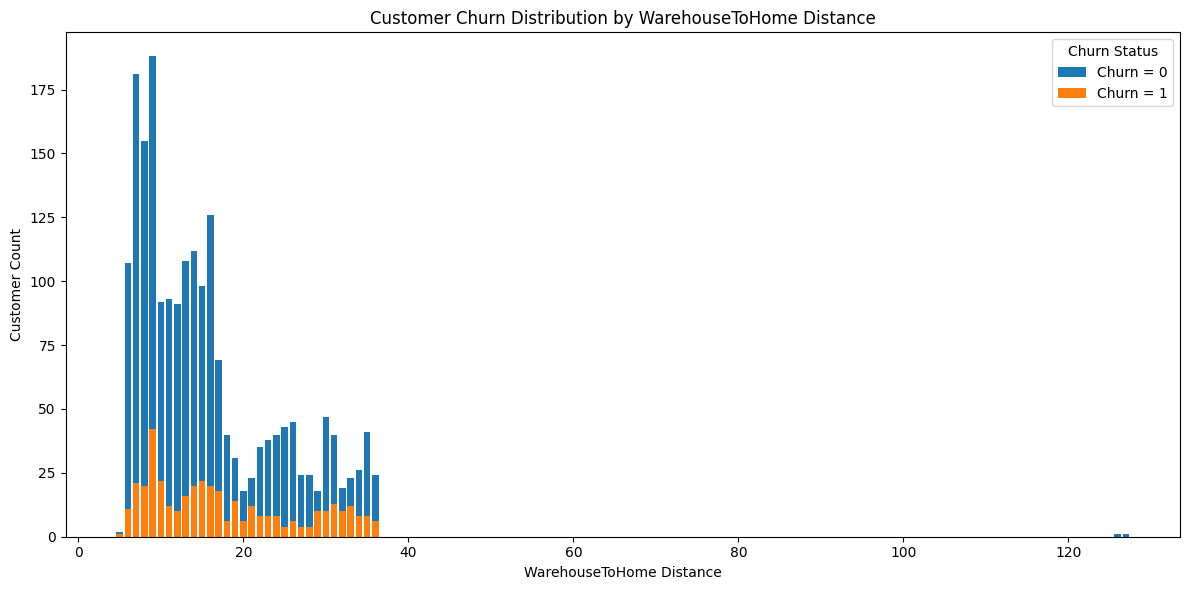

In [58]:
# Assuming 'data' is your DataFrame
grouped_data = data.groupby(['Churn', 'CityTier', 'WarehouseToHome'])['Churn'].count().reset_index(name='Count')

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))

# Bar plot
for churn_status in grouped_data['Churn'].unique():
    churn_data = grouped_data[grouped_data['Churn'] == churn_status]
    plt.bar(churn_data['WarehouseToHome'], churn_data['Count'], label=f'Churn = {churn_status}',)# alpha=0.6

# Labels and title
plt.xlabel('WarehouseToHome Distance')
plt.ylabel('Customer Count')
plt.title('Customer Churn Distribution by WarehouseToHome Distance')
plt.legend(title='Churn Status')

# Show the plot
plt.tight_layout()
plt.show()

As the distance to the warehouse Increases, The ratio of the number of customers who churn with respect to number of customers who do not churn becomes closer. Increase in distance points out a possibility of churning.

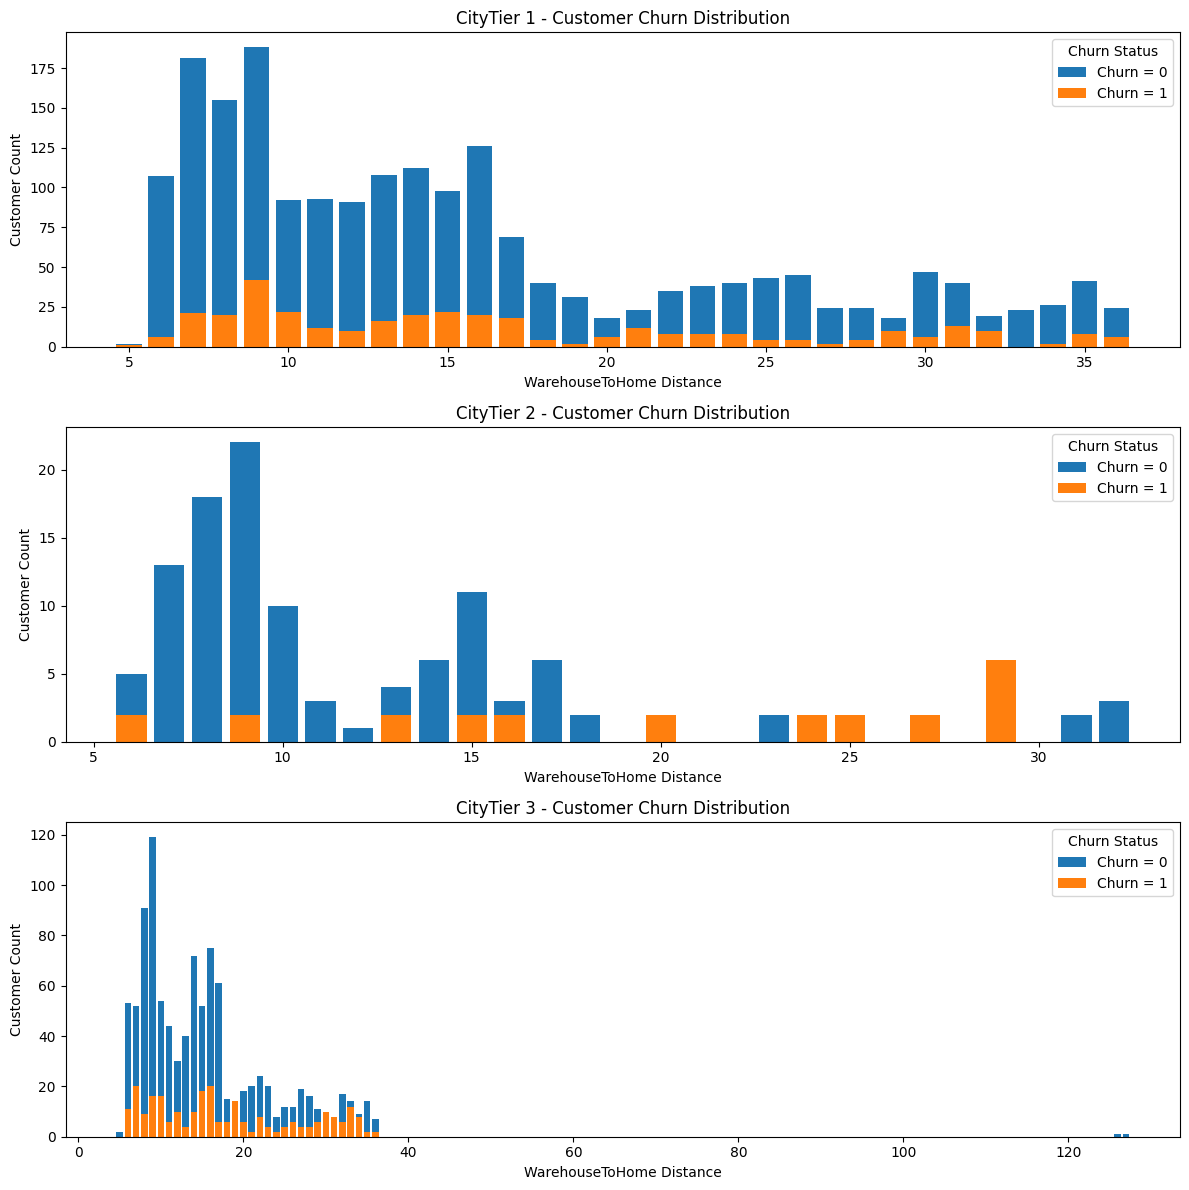

In [112]:
import matplotlib.pyplot as plt
grouped_data = data.groupby(['Churn', 'CityTier', 'WarehouseToHome'])['CityTier'].count().reset_index(name='Count')
# Unique CityTiers
city_tiers = grouped_data['CityTier'].unique()

# Create subplots: one for each CityTier
fig, axes = plt.subplots(len(city_tiers), 1, figsize=(12, len(city_tiers) * 4))

# Iterate over CityTiers and create a plot for each
for i, city_tier in enumerate(city_tiers):
    ax = axes[i] if len(city_tiers) > 1 else axes  # Handle case for a single subplot
    city_data = grouped_data[grouped_data['CityTier'] == city_tier]
    
    # Plot bar chart for each Churn status within this CityTier
    for churn_status in city_data['Churn'].unique():
        churn_data = city_data[city_data['Churn'] == churn_status]
        ax.bar(churn_data['WarehouseToHome'], churn_data['Count'], label=f'Churn = {churn_status}', )#alpha=0.6
    
    # Add labels and title for each subplot
    ax.set_xlabel('WarehouseToHome Distance')
    ax.set_ylabel('Customer Count')
    ax.set_title(f'CityTier {city_tier} - Customer Churn Distribution')
    ax.legend(title='Churn Status')

plt.tight_layout()
plt.show()


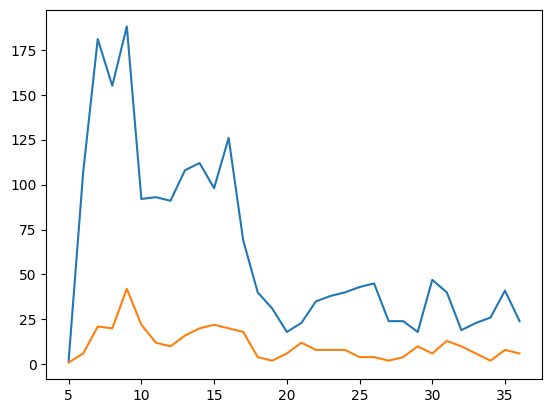

In [118]:
gd_ch_0_tier_1 = grouped_data[grouped_data["Churn"]==0][grouped_data["CityTier"]==1]
plt.plot(gd_ch_0_tier_1['WarehouseToHome'], gd_ch_0_tier_1['Count'])

gd_ch_1_tier_1 = grouped_data[grouped_data["Churn"]==1][grouped_data["CityTier"]==1]
plt.plot(gd_ch_1_tier_1['WarehouseToHome'], gd_ch_1_tier_1['Count'])

gd_ch_tier_1_diff = gd_ch_0_tier_1 - gd_ch_1_tier_1
plt.plot(gd_ch_tier_1_diff['WarehouseToHome'], gd_ch_tier_1_diff['Count'])

plt.show()

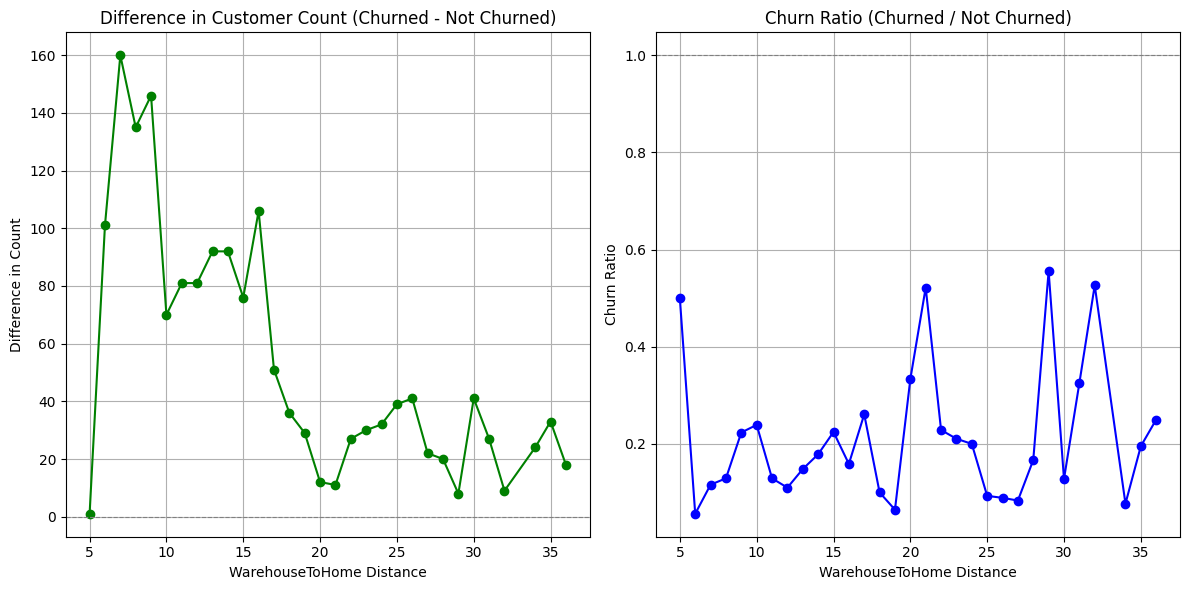

In [129]:


# Filter data for Churn = 0 and Churn = 1 in CityTier = 1
gd_ch_0_tier_1 = grouped_data[(grouped_data["Churn"] == 0) & (grouped_data["CityTier"] == 1)]
gd_ch_1_tier_1 = grouped_data[(grouped_data["Churn"] == 1) & (grouped_data["CityTier"] == 1)]

# Merge the two DataFrames on 'WarehouseToHome'
merged_data = pd.merge(gd_ch_0_tier_1[['WarehouseToHome', 'Count']], 
                        gd_ch_1_tier_1[['WarehouseToHome', 'Count']], 
                        on='WarehouseToHome', 
                        suffixes=('_churn0', '_churn1'))

# Calculate the difference and ratio
merged_data['Count_Diff'] = merged_data['Count_churn0'] - merged_data['Count_churn1']
merged_data['Ratio'] = merged_data['Count_churn1'] / merged_data['Count_churn0'].replace(0, pd.NA)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot for Count Difference
axes[0].plot(merged_data['WarehouseToHome'], merged_data['Count_Diff'], marker='o', color='green')
axes[0].axhline(0, color='grey', lw=0.8, ls='--')  
axes[0].set_title('Difference in Customer Count (Churned - Not Churned)')
axes[0].set_xlabel('WarehouseToHome Distance')
axes[0].set_ylabel('Difference in Count')
axes[0].grid()

# Plot for Ratio
axes[1].plot(merged_data['WarehouseToHome'], merged_data['Ratio'], marker='o', color='blue')
axes[1].axhline(1, color='grey', lw=0.8, ls='--')  
axes[1].set_title('Churn Ratio (Churned / Not Churned)')
axes[1].set_xlabel('WarehouseToHome Distance')
axes[1].set_ylabel('Churn Ratio')
axes[1].grid()

# Show the plots
plt.tight_layout()
plt.show()


The number of people who churn increases in the 10-20 range, and decreases in 20-30 range. Beyond that, it is fluctuating.

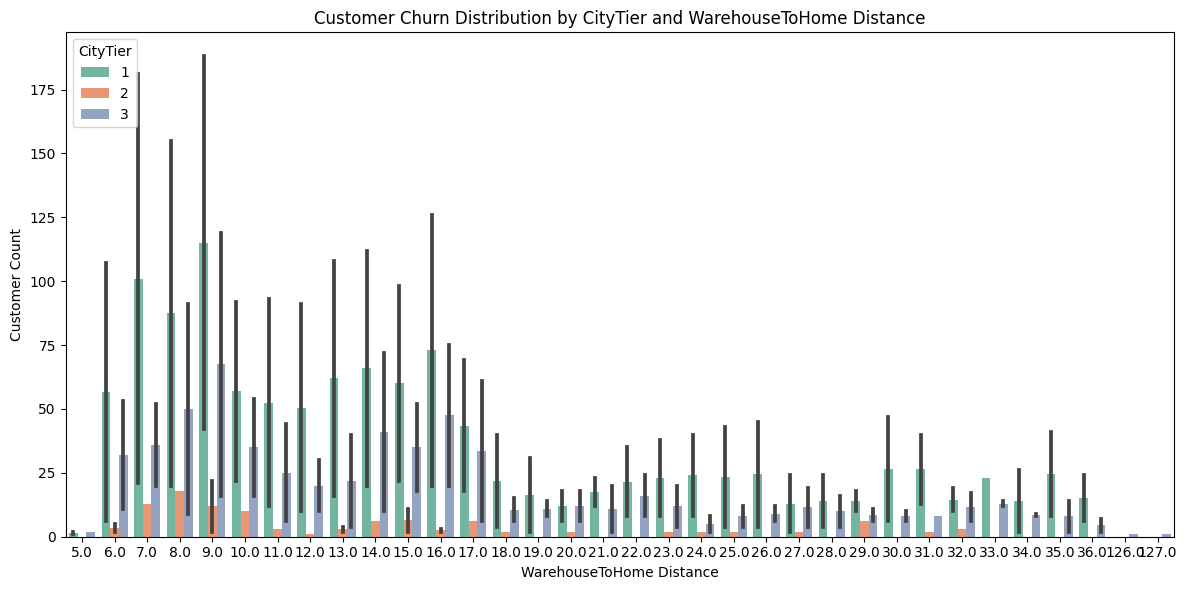

In [56]:


# Seaborn bar plot with CityTier as hue
plt.figure(figsize=(12, 6))
sns.barplot(x='WarehouseToHome', y='Count', hue='CityTier', data=grouped_data, palette='Set2')

# Labels and title
plt.xlabel('WarehouseToHome Distance')
plt.ylabel('Customer Count')
plt.title('Customer Churn Distribution by CityTier and WarehouseToHome Distance')

plt.tight_layout()
plt.show()


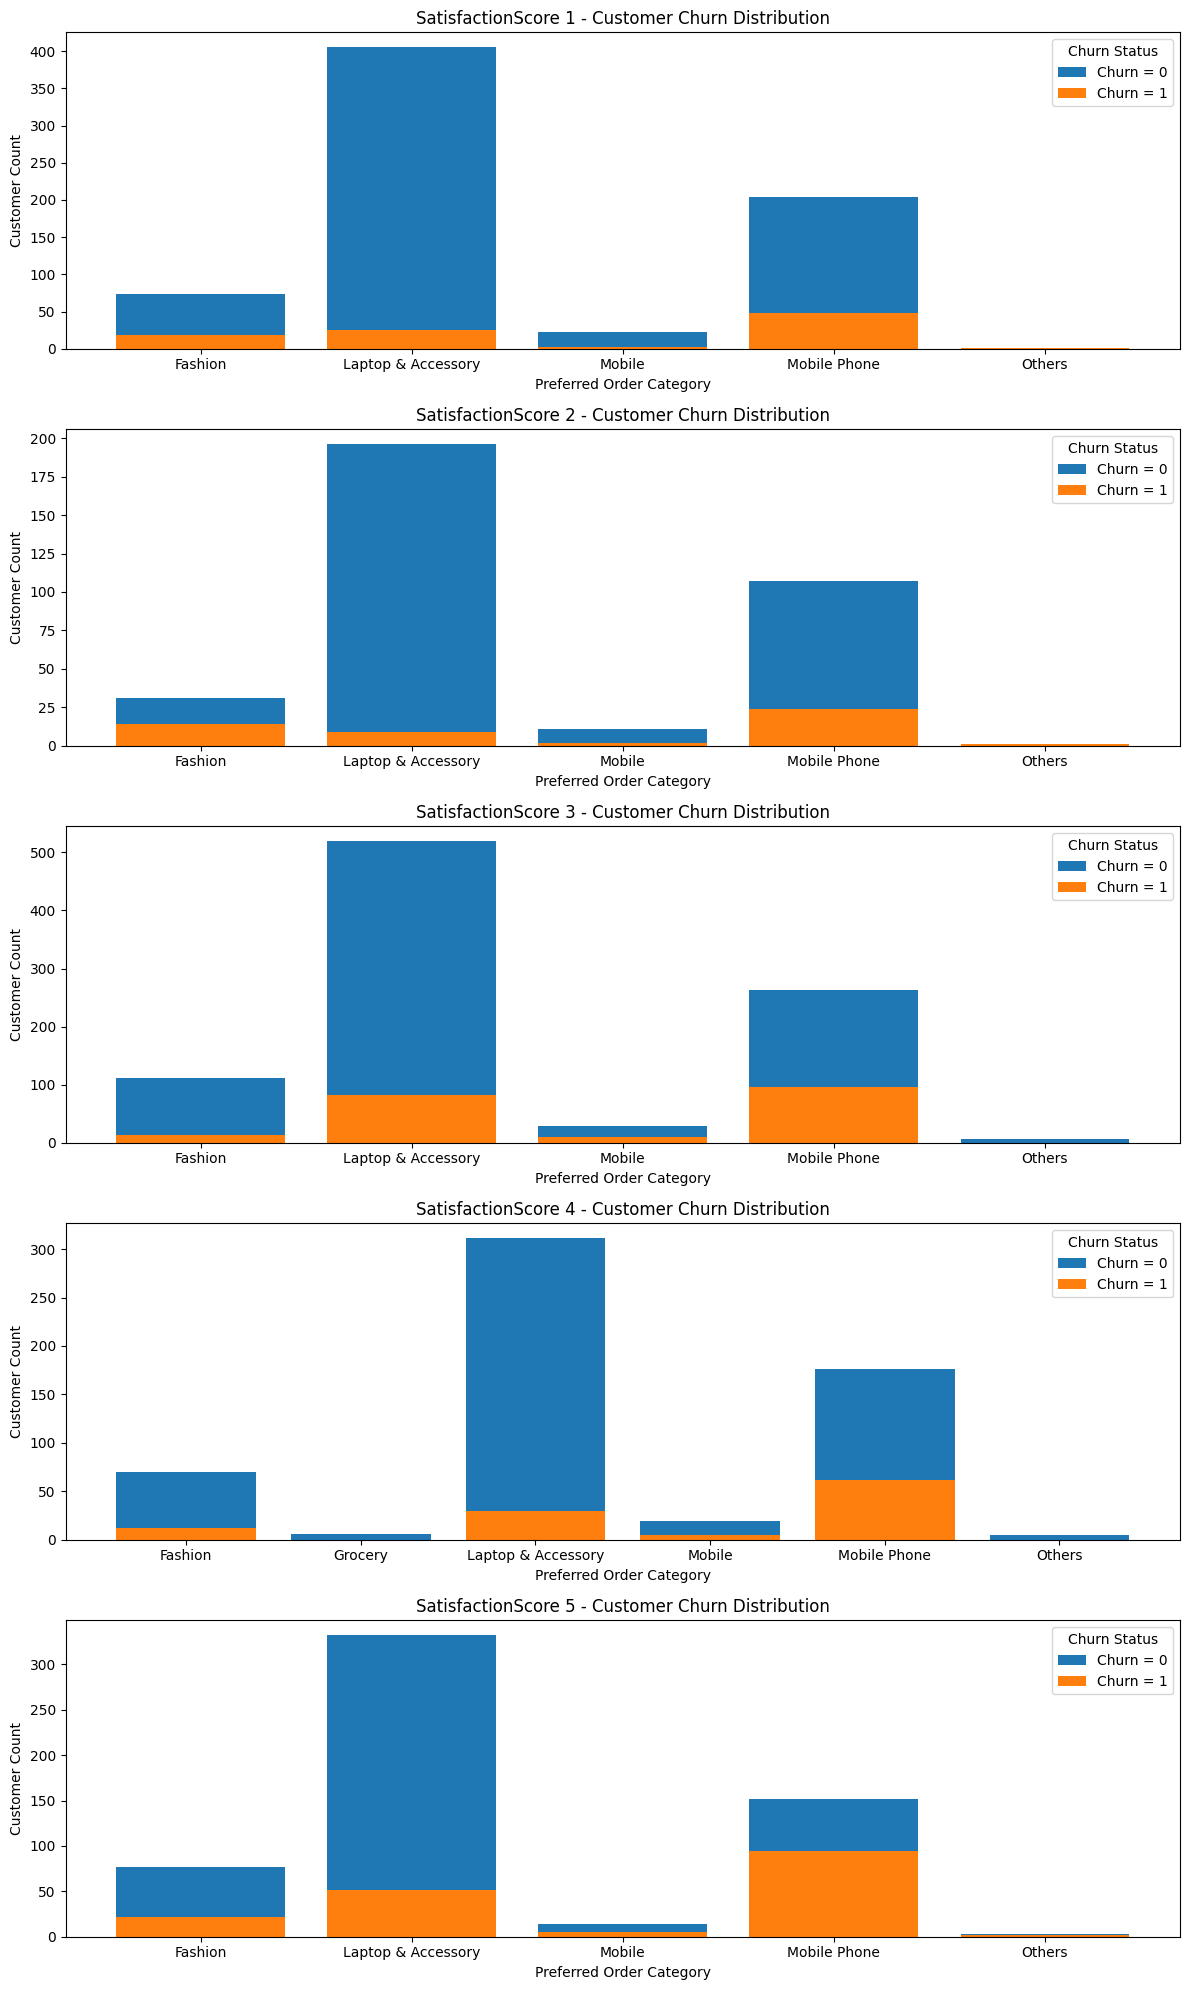

In [79]:

grouped_data = data.groupby(['Churn', 'SatisfactionScore','PreferedOrderCat'])['SatisfactionScore'].count().reset_index(name='Count')
# Unique Scores
Scores = grouped_data['SatisfactionScore'].unique()

# Create subplots: one for each Scores
fig, axes = plt.subplots(len(Scores), 1, figsize=(12, len(Scores) * 4))

# Iterate over Scores and create a plot for each
for i, score in enumerate(Scores):
    ax = axes[i] if len(Scores) > 1 else axes  # Handle case for a single subplot
    Scores = grouped_data[grouped_data['SatisfactionScore'] == score]
    
    # Plot bar chart for each Churn status within this Score
    for churn_status in Scores['Churn'].unique():
        churn_data = Scores[Scores['Churn'] == churn_status]
        ax.bar(churn_data['PreferedOrderCat'], churn_data['Count'], label=f'Churn = {churn_status}', )#alpha=0.6
    
    # Add labels and title for each subplot
    ax.set_xlabel('Preferred Order Category')
    ax.set_ylabel('Customer Count')
    ax.set_title(f'SatisfactionScore {score} - Customer Churn Distribution')
    ax.legend(title='Churn Status')

plt.tight_layout()
plt.show()


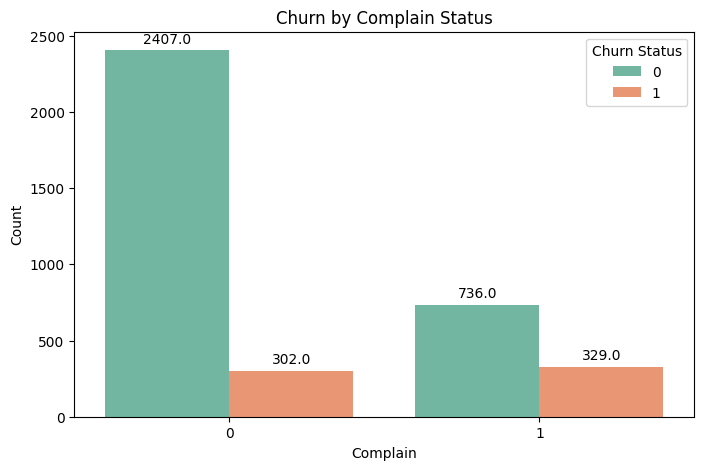

In [84]:
# Bar plot for Complain
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Complain', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Complain Status')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Annotate counts above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

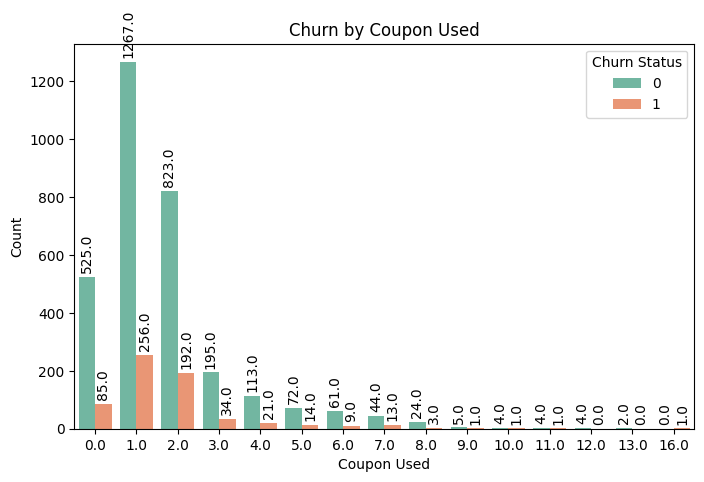

In [86]:
# Bar plot for CouponUsed
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='CouponUsed', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Coupon Used')
plt.xlabel('Coupon Used')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Annotate counts above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points',
                rotation=90)

plt.show()

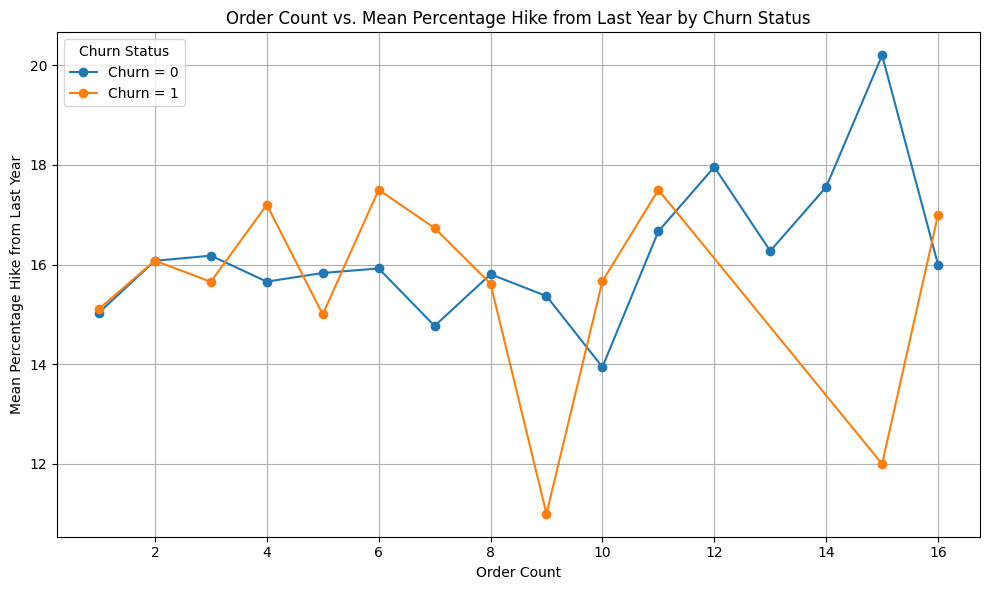

In [130]:
# Group by OrderCount and Churn status, and calculate the mean percentage hike
grouped_data = data.groupby(['OrderCount', 'Churn']).agg(
    mean_hike=('OrderAmountHikeFromlastYear', 'mean')
).reset_index()

# Prepare for plotting
plt.figure(figsize=(10, 6))

# Plotting Order Count vs. Mean Hike for Not Churned and Churned
for churn_status in grouped_data['Churn'].unique():
    subset = grouped_data[grouped_data['Churn'] == churn_status]
    plt.plot(subset['OrderCount'], subset['mean_hike'], marker='o', label=f'Churn = {churn_status}')

# Adding titles and labels
plt.title('Order Count vs. Mean Percentage Hike from Last Year by Churn Status')
plt.xlabel('Order Count')
plt.ylabel('Mean Percentage Hike from Last Year')
plt.xticks(rotation=0)
plt.legend(title='Churn Status')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
